In [14]:
from numpy import dot, sum, tile
from numpy.linalg import inv, det
from math import log, exp, pi
from numpy.random import randn  


def kf_predict(X, P, A, Q, B, U):
    X = dot(A, X) + dot(B, U)
    P = dot(A, dot(P, A.T)) + Q
    return (X, P)


def kf_update(X, P, Y, H, R):
    IM = dot(H, X)
    IS = R + dot(H, dot(P, H.T))
    K = dot(P, dot(H.T, inv(IS)))
    X = X + dot(K, (Y - IM))
    P = P - dot(K, dot(IS, K.T))
    LH = gauss_pdf(Y, IM, IS)
    return (X, P, K, IM, IS, LH)


def gauss_pdf(X, M, S):
    if M.shape[1] == 1:
        DX = X - tile(M, X.shape[1])
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    elif X.shape[1] == 1:
        DX = tile(X, M.shape[1]) - M
        E = 0.5 * sum(DX * (dot(inv(S), DX)), axis=0)
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    else:
        DX = X - M
        E = 0.5 * dot(DX.T, dot(inv(S), DX))
        E = E + 0.5 * M.shape[0] * log(2 * pi) + 0.5 * log(det(S))
        P = exp(-E)
    return (P, E)

/tmp/ipykernel_66224/4119205839.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  P = exp(-E)


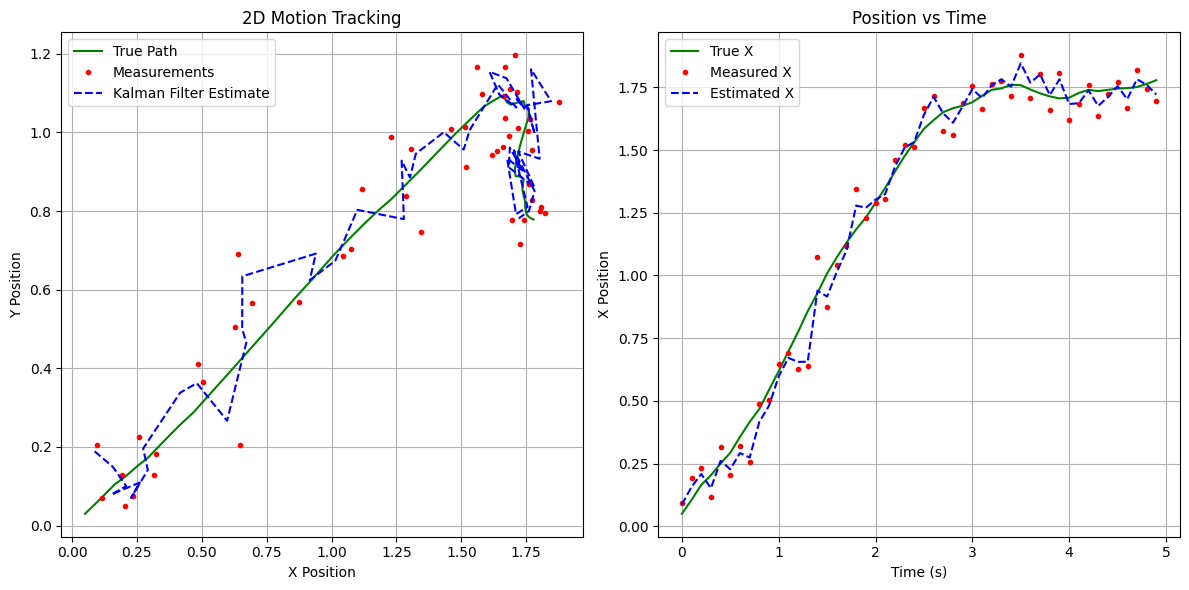

In [ ]:
import numpy as np
from numpy import dot, random
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Time step
dt = 0.1
# Number of iterations
N_iter = 50

# Initialize storage for plotting
x_pos_true = np.zeros(N_iter)
y_pos_true = np.zeros(N_iter)
x_pos_measured = np.zeros(N_iter)
y_pos_measured = np.zeros(N_iter)
x_pos_estimated = np.zeros(N_iter)
y_pos_estimated = np.zeros(N_iter)

# Initial true state (position and velocity)
true_state = np.array([[0.0], [0.0], [0.5], [0.3]])  # [x, y, vx, vy]

# Initialize Kalman Filter state
X = np.array([[0.0], [0.0], [0.0], [0.0]])  # Initial state estimate
P = np.diag([1.0, 1.0, 1.0, 1.0])  # Initial uncertainty
A = np.array([[1, 0, dt, 0],
              [0, 1, 0, dt],
              [0, 0, 1, 0],
              [0, 0, 0, 1]])  # State transition matrix
H = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0]])  # Measurement matrix
Q = np.eye(4) * 0.1  # Process noise
R = np.eye(2) * 0.1  # Measurement noise
B = np.eye(4)
U = np.zeros((4, 1))

# Simulation loop
for i in range(N_iter):
    # True state evolution (constant velocity + small random acceleration)
    true_state = dot(A, true_state) + np.array([[0], [0], [0.1], [0.1]]) * random.randn()
    
    # Generate noisy measurement
    Y = dot(H, true_state) + random.randn(2, 1) * 0.1
    
    # Kalman Filter prediction and update
    (X, P) = kf_predict(X, P, A, Q, B, U)
    (X, P, K, IM, IS, LH) = kf_update(X, P, Y, H, R)
    
    # Store data for plotting
    x_pos_true[i] = true_state[0, 0]
    y_pos_true[i] = true_state[1, 0]
    x_pos_measured[i] = Y[0, 0]
    y_pos_measured[i] = Y[1, 0]
    x_pos_estimated[i] = X[0, 0]
    y_pos_estimated[i] = X[1, 0]

# Plotting
plt.figure(figsize=(12, 6))

# Plot trajectories
plt.subplot(121)
plt.plot(x_pos_true, y_pos_true, 'g-', label='True Path')
plt.plot(x_pos_measured, y_pos_measured, 'r.', label='Measurements')
plt.plot(x_pos_estimated, y_pos_estimated, 'b--', label='Kalman Filter Estimate')
plt.title('2D Motion Tracking')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)

# Plot position vs time
plt.subplot(122)
t = np.arange(0, N_iter*dt, dt)
plt.plot(t, x_pos_true, 'g-', label='True X')
plt.plot(t, x_pos_measured, 'r.', label='Measured X')
plt.plot(t, x_pos_estimated, 'b--', label='Estimated X')
plt.title('Position vs Time')
plt.xlabel('Time (s)')
plt.ylabel('X Position')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
Y

array([[4.54307475],
       [3.46725169]])